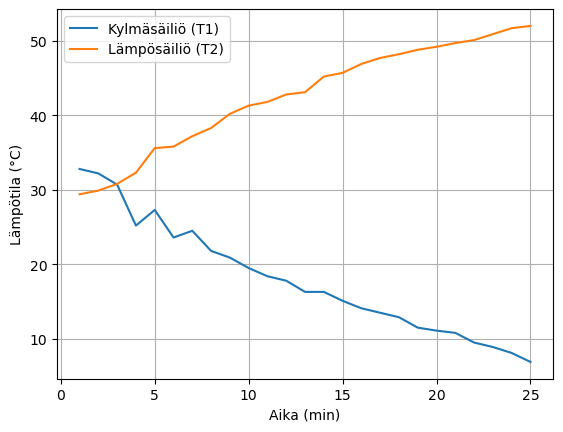

In [4]:
import matplotlib.pyplot as plt
import numpy as np

time = np.arange(1, 26)
T1 = [32.8, 32.2, 30.7, 25.2, 27.3, 23.6, 24.5, 21.8, 20.9, 19.5, 18.4, 17.8, 16.3, 16.3, 15.1, 14.1, 13.5, 12.9, 11.5, 11.1, 10.8, 9.5, 8.9, 8.1, 6.9]
T2 = [29.4, 29.9, 30.8, 32.3, 35.6, 35.8, 37.2, 38.3, 40.2, 41.3, 41.8, 42.8, 43.1, 45.2, 45.7, 46.9, 47.7, 48.2, 48.8, 49.2, 49.7, 50.1, 50.9, 51.7, 52.0]

plt.plot(time, T1, label='Kylmäsäiliö (T1)')
plt.plot(time, T2, label='Lämpösäiliö (T2)')
plt.xlabel('Aika (min)')
plt.ylabel('Lämpötila (°C)')
plt.legend()
plt.grid(True)
plt.savefig('temperature_plot.png')

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib as plt

#load data from web
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\korpe\anaconda3\envs\python-course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Count of job_titles
df.pivot_table(values='salary_year_avg', columns='job_title_short', index='job_country', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


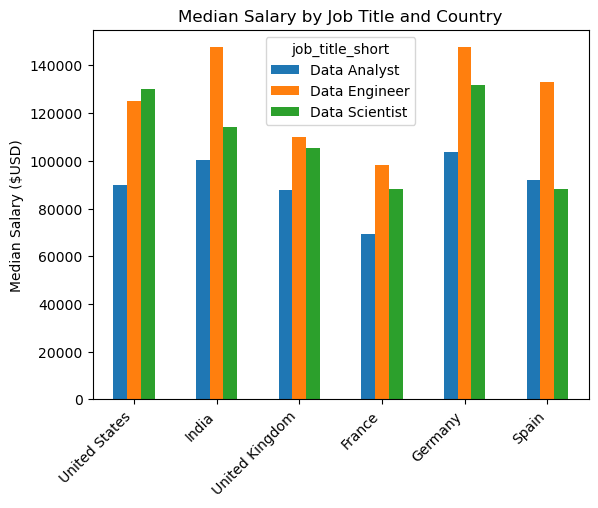

In [30]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg', 
    columns='job_title_short', 
    index='job_country', 
    aggfunc='median'
    )

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Job Title and Country')
plt.xticks(rotation=45, ha='right')
plt.show()